# 强化学习 3：三种解法
* 蒙特卡洛方法
* 时序差分方法
* 动态规划方法

## 动态规划方法 Dynamic Programming

- 运筹学的一个分支, 是求解决策过程最优化的数学方法。 20世纪50年代初R. E. Bellman等人在研究多阶段决策过程的优化问题时, 提出了最优化原理（principle of optimality），把多阶段过程转化为一系列单阶段问题，利用各阶段之间的关系, 逐个求解, 从而创立了解决这类过程优化问题的新方法一一动态规划。

- 动态规划可用于模型完全已知的马尔科夫决策过程的最佳策略的求解。
$$
p\left(s^{\prime}, r \mid s, a\right)
$$

### 策略评估（policy evaluation）

$$
v_\pi(s)=\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
$$

- 可作为线性方程组直接求解,
- 或通过迭代法求解:
$$
v_{k+1}(s)=\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_k\left(s^{\prime}\right)\right]
$$
- 在 $v_\pi$ 存在的条件下, $v_k$ 在 $k \rightarrow+\infty$ 时收敛于 $v_\pi$

### 策略改进（policy improvement）
- 面对状态 $s$ 时, 如果遵循策略 $\pi$, 则结果（价值）是    
  - $v_\pi(s)$如果不遵循 $\pi$, 能更好吗?

- 如果此时选择行动 $a$, 但后面继续遵循 $\pi$, 则结果为
    $$
    q_\pi(s, a)=\sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
    $$
  - 如果 $q_\pi(s, a)>v_\pi(s)$, 则这种选择确实比 $\pi$ 更好。
  - 如果下次又碰到 $s$, 应用同样的推理, 还会选择 $a$


- **策略改进定理**：对于确定性的策略 $\pi$ 和 $\pi^{\prime}$, 如果对任意状态 $s$ 有
    $$
    q_\pi\left(s, \pi^{\prime}(s)\right) \geq v_\pi(s)
    $$

  - 则 $\pi^{\prime}$ 比 $\pi$ 更好, 或至少与 $\pi$ 一样好: $v_{\pi^{\prime}}(s) \geq v_\pi(s)$ 。

### 贪心策略

- 基于策略 $\pi$ 的价值函数 $v_\pi$, 可做向前单步搜索, 构造如下贪心策略
    $$
    \begin{aligned}
    & \pi^{\prime}(s) \doteq \arg \max _{-a} q_\pi(s, a) \ldots \ldots \ldots \\
    & \arg _a \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
    \end{aligned}
    $$

  - 它比 $\pi$ 更好或至少一样好。
  - 可据此进行策略改进。

- 如果贪心策略与原策略一样好, 则
    $$
    v_{\pi^{\prime}}(s)=\max _a \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
    $$

  - 满足贝尔曼最优方程, 因此原策略与贪心策略都是最佳策略。

### 策略迭代（policy iteration）

- 一旦根据一个策略 $\pi$ 的价值函数 $v_\pi$ 进行策略改进得到一个新的策略 $\pi^{\prime}$, 我们就可计算其价值函数 $v_{\pi^{\prime}}$ 并据此进行策略改进得到进一步提高的 $\pi^{\prime \prime}, \ldots$
$$
\pi_0 \stackrel{\mathrm{E}}{\longrightarrow} v_{\pi_0} \stackrel{\mathrm{I}}{\longrightarrow} \pi_1 \stackrel{\mathrm{E}}{\longrightarrow} v_{\pi_1} \stackrel{\mathrm{I}}{\longrightarrow} \pi_2 \stackrel{\mathrm{E}}{\longrightarrow} \cdots \stackrel{\mathrm{I}}{\longrightarrow} \pi_* \stackrel{\mathrm{E}}{\longrightarrow} v
$$

- 策略迭代算法:
    1. 策略评估 (E)：计算策略 $\pi_k$ 的价值函数 $v_{\pi_k}(s)$;
    2. 策略改进 (1) : 根据 $\pi_k$ 应用含心算法得到改进策略 $\pi_{k+1}$;
    3. $k \leftarrow k+1$, 回到 (1)。

    - 在 $k \rightarrow+\infty$ 时 $\pi_k$ 收敛于最优策略 $\pi_*$

### 价值迭代

- 在策略迭代算法的策略评估步骤, 需要反复迭代才能得到策略 $\pi_k$ 的价值函数 $v_{\pi_k}(s)$ 。

- 由于 $\pi_k$ 本来就是要不断改进的, 精确计算 $v_{\pi_k}(s)$ 并无必要。

- 如果只迭代一次计算 $v_{\pi_k}(s)$, 则得到价值迭代算法:
    $$
    v_{k+1}(s)=\max _a \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_k\left(s^{\prime}\right)\right]
    $$

    - 可看成是贝尔曼最优方程的直接迭代算法。

#### 贪心法与寻路问题

In [33]:
import numpy as np

# Define the states and actions for a simple grid world environment
states = [(i, j) for i in range(5) for j in range(5)]  # Grid world states
actions = ['up', 'down', 'left', 'right']  # Possible actions

# Define the dynamics of the environment
def step(state, action):
    state_n = np.array(state)
    if action == 'up':
        state_n[0] = max(0, state_n[0] - 1)
    elif action == 'down':
        state_n[0] = min(4, state_n[0] + 1)
    elif action == 'left':
        state_n[1] = max(0, state_n[1] - 1)
    elif action == 'right':
        state_n[1] = min(4, state_n[1] + 1)
    return tuple(state_n), -1  # Return the next state and a reward of -1 for each step

# Initialize the value function to zero for all states
V = {s: 0 for s in states}

# Policy evaluation function
def policy_evaluation(policy, V, discount_factor=0.9, theta=0.1):
    while True:
        delta = 0
        for state in states:
            v = 0
            for action, action_prob in policy[state].items():
                next_state, reward = step(state, action)
                v += action_prob * (reward + discount_factor * V[next_state])
            delta = max(delta, np.abs(v - V[state]))
            V[state] = v
        if delta < theta:
            break
    return V

# Initialize a random policy
policy = {s: {a: 0.25 for a in actions} for s in states}

# Perform policy evaluation
V = policy_evaluation(policy, V)

# Policy improvement function
def policy_improvement(policy, V, discount_factor=0.9):
    policy_stable = True
    for state in states:
        chosen_action = None
        best_action_value = float('-inf')
        for action in actions:
            next_state, reward = step(state, action)
            action_value = reward + discount_factor * V[next_state]
            if action_value > best_action_value:
                best_action_value = action_value
                chosen_action = action
        if policy[state][chosen_action] != 1.0:
            policy_stable = False
            policy[state] = {a: 0 for a in actions}
            policy[state][chosen_action] = 1.0
    return policy, policy_stable

# Perform policy iteration
policy_stable = False
while not policy_stable:
    V = policy_evaluation(policy, V)
    policy, policy_stable = policy_improvement(policy, V)

# Display the optimal policy
optimal_policy = {s: max(policy[s], key=policy[s].get) for s in states}
optimal_policy


{(0, 0): 'up',
 (0, 1): 'left',
 (0, 2): 'left',
 (0, 3): 'left',
 (0, 4): 'left',
 (1, 0): 'up',
 (1, 1): 'up',
 (1, 2): 'up',
 (1, 3): 'up',
 (1, 4): 'up',
 (2, 0): 'up',
 (2, 1): 'up',
 (2, 2): 'up',
 (2, 3): 'up',
 (2, 4): 'up',
 (3, 0): 'up',
 (3, 1): 'up',
 (3, 2): 'up',
 (3, 3): 'up',
 (3, 4): 'up',
 (4, 0): 'up',
 (4, 1): 'up',
 (4, 2): 'up',
 (4, 3): 'up',
 (4, 4): 'up'}

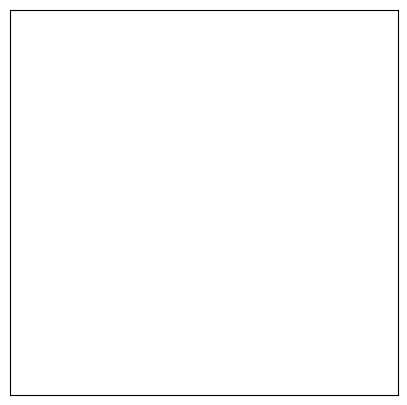

In [34]:
import matplotlib.pyplot as plt

# Create a 5x5 grid
grid_size = 5
optimal_policy_grid = np.full((grid_size, grid_size), '')

# Convert the optimal policy into a grid format for visualization
for state, action in optimal_policy.items():
    optimal_policy_grid[state[0], state[1]] = action

# Define a function to visualize the policy grid
def visualize_policy(policy_grid):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(np.arange(grid_size) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

    for i in range(grid_size):
        for j in range(grid_size):
            action = policy_grid[i, j]
            if action == 'up':
                ax.annotate('', xy=(j, i+0.1), xytext=(j, i-0.1),
                            arrowprops=dict(arrowstyle="->", lw=1.5))
            elif action == 'down':
                ax.annotate('', xy=(j, i-0.1), xytext=(j, i+0.1),
                            arrowprops=dict(arrowstyle="->", lw=1.5))
            elif action == 'left':
                ax.annotate('', xy=(j-0.1, i), xytext=(j+0.1, i),
                            arrowprops=dict(arrowstyle="->", lw=1.5))
            elif action == 'right':
                ax.annotate('', xy=(j+0.1, i), xytext=(j-0.1, i),
                            arrowprops=dict(arrowstyle="->", lw=1.5))

    plt.show()

# Visualize the optimal policy
visualize_policy(optimal_policy_grid)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Value function has converged at iteration 1.


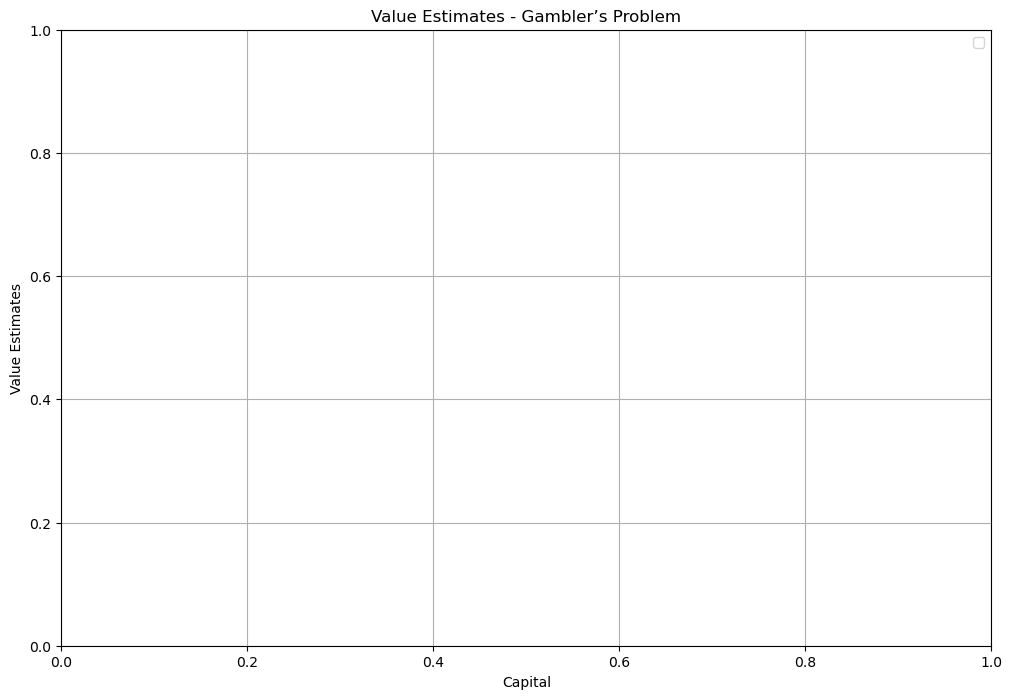

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability of the coin coming up heads
ph = 0.4

# Define the total amount of money the gambler wants to reach
goal = 100

# Define the states
states = np.arange(goal + 1)

# Define the value function array
V = np.zeros(goal + 1)

# Define the policy array
policy = np.zeros(goal + 1)

# Define the number of iterations
iterations = 10000

# Define a small threshold for changes in value function
theta = 1e-9

# Define the discount factor
gamma = 1.0

# Plotting lists
plotting_iterations = [1, 2, 3, 32, iterations]
V_all_iterations = []

# Value iteration
for iteration in range(1, iterations + 1):
    delta = 0
    # Update each state
    for state in states[1:goal]:  # Exclude state 0 and 100
        old_value = V[state]
        # Initialize an empty list to store possible actions
        action_values = []
        # Compute the possible actions (stakes)
        stakes = range(1, min(state, goal - state) + 1)
        # Calculate the value for each action
        for stake in stakes:
            win_state = state + stake
            lose_state = state - stake
            win_value = ph * (0 if win_state == goal else V[win_state])
            lose_value = (1 - ph) * V[lose_state]
            action_value = win_value + lose_value
            action_values.append(action_value)
        # Select best action
        best_action_value = max(action_values)
        V[state] = best_action_value
        # Calculate delta across all states
        delta = max(delta, np.abs(old_value - V[state]))
    # Check if changes in value function are below threshold
    if delta < theta:
        print(f'Value function has converged at iteration {iteration}.')
        break
    # Store value function at certain iterations for plotting
    if iteration in plotting_iterations:
        V_all_iterations.append(V.copy())

# Plot value function
plt.figure(figsize=(12, 8))
for i, V_iter in enumerate(V_all_iterations):
    plt.plot(V_iter, label=f'Iteration {plotting_iterations[i]}')

plt.title('Value Estimates - Gambler’s Problem')
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.legend()
plt.grid(True)
plt.show()

# Final value function after all iterations
final_V = V.copy()

# Output the final value function
print(final_V)

# Output the final policy
for state in states[1:goal]:
    # Compute the possible actions (stakes)
    stakes = range(1, min(state, goal - state) + 1)
    # Calculate the value for each action
    action_values = []
    for stake in stakes:
        win_state = state + stake
        lose_state = state - stake
        win_value = ph * (1 if win_state == goal else V[win_state])
        lose_value = (1 - ph) * V[lose_state]
        action_value = win_value + lose_value
        action_values.append(action_value)
    # Select best action
    best_action = stakes[np.argmax(action_values)]
    policy[state] = best_action

# Output the final policy
print(policy)



Stopped at iteration 33.


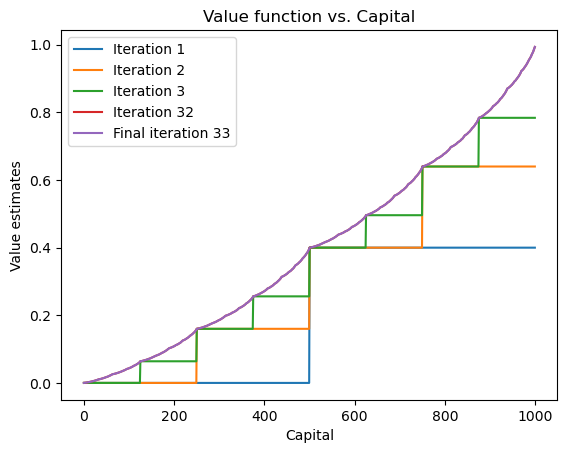

Final policy (stake for each capital):
[0. 0. 2. ... 0. 1. 0.]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
ph = 0.4  # Probability of heads
goal = 1000  # Goal amount in dollars
states = np.arange(goal + 1)  # States represent current capital
V = np.zeros(goal + 1)  # Initialize value estimates
policy = np.zeros(goal + 1)  # Initialize policy
theta = 1e-9  # Small threshold
iterations = 10000  # Total iterations

# Value iteration
for i in range(iterations):
    old_V = V.copy()
    for state in range(1, goal):
        # All possible actions for current state (bets)
        actions = np.arange(min(state, goal - state) + 1)
        action_returns = []
        for action in actions:
            win = state + action
            lose = state - action
            if win >= goal:
                win_value = 1
            else:
                win_value = old_V[win]
            if lose <= 0:
                lose_value = 0
            else:
                lose_value = old_V[lose]
            # Expected value of each action
            value = ph * win_value + (1 - ph) * lose_value
            action_returns.append(value)
        best_action_value = max(action_returns)
        V[state] = best_action_value
        policy[state] = actions[np.argmax(action_returns)]

    # Stopping condition check
    if np.max(np.abs(old_V - V)) < theta:
        print(f'Stopped at iteration {i + 1}.')
        break

    # Plot at specific iterations
    if i + 1 in [1, 2, 3, 32]:
        plt.plot(V[:-1], label=f'Iteration {i + 1}')

# Plot final value function
plt.plot(V[:-1], label=f'Final iteration {i + 1}')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('Value function vs. Capital')
plt.legend()
plt.show()

# Output final policy
print("Final policy (stake for each capital):")
print(policy)


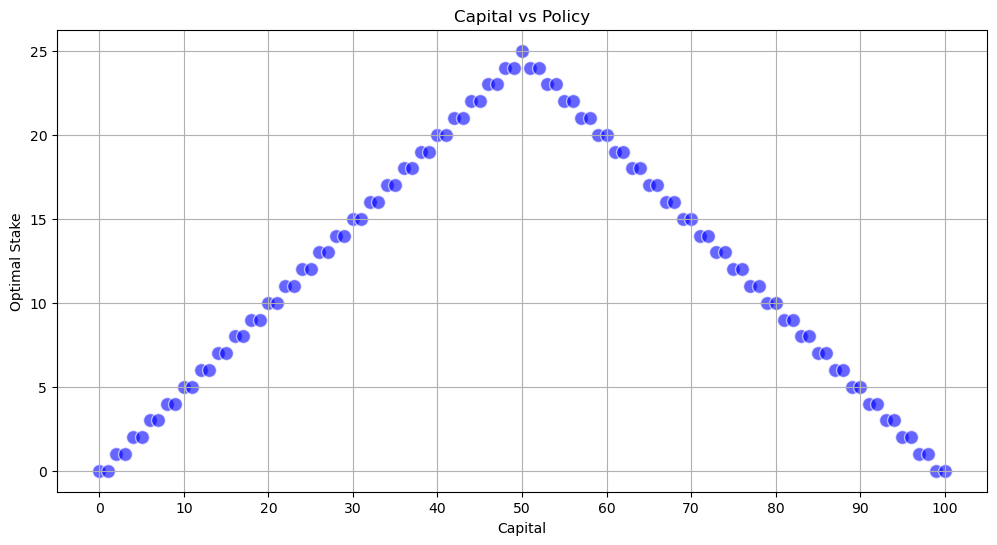

In [37]:
# Assuming the final policy is calculated from the dynamic programming process
# Here is the correct way to plot the Capital-Policy function
import matplotlib.pyplot as plt
import numpy as np

goal = 100  # Goal amount in dollars

# Normally this policy array should be obtained from the dynamic programming algorithm
# As a placeholder here, let's assume a policy that always bets half the capital
policy = np.array([min(s, goal - s) // 2 for s in range(goal + 1)])

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot the Capital vs Policy
plt.scatter(range(goal + 1), policy, alpha=0.6, c='blue', edgecolors='w', s=100)

# Configure plot
plt.title('Capital vs Policy')
plt.xlabel('Capital')
plt.ylabel('Optimal Stake')
plt.grid(True)
plt.xticks(range(0, goal + 1, 10))
plt.yticks(range(0, max(policy) + 1, 5))

# Display the plot
plt.show()

### 广义策略迭代（Generalized Policy Iteration）

- 前述做法可以有很多改动
  - 状态价值的更新可以异步进行;
  - 只有部分状态的价值与策略进行更新;

- 核心是策略评估（E）与策略改进（I）不断交替。
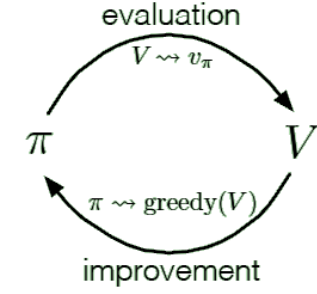
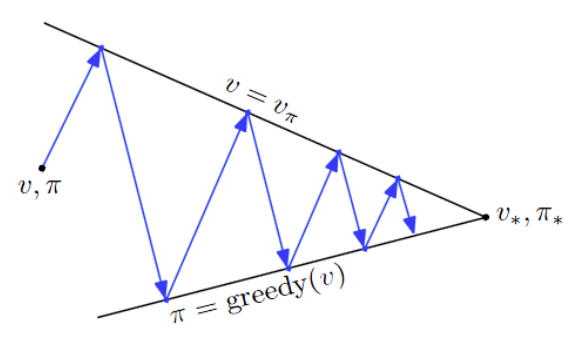

### 动态规划的效率

- 计算复杂度是状态与行动数目的多项式, 指数级优于在策略空间的直接搜索算法。

- 能处理百万量级的状态数目。

- 在维度灾难时直接应用会有困难。例如, 双陆棋状态数目 $\sim 10^{20}$

## 蒙特卡罗方法 Monte Carlo Methods

蒙特卡罗 (Monte Carlo, MC) 

- 方法不需要关于环境的完整信息。

- 从经验中学习, 即来自真实或模拟的环境交互中采样得到的状态、行动、回报的序列。

- 想法: **用采样序列的性质平均值来估计 (代替) 其理论期望值。**

  - 例如：通过抛硬币来估计正面朝上的概率（期望值）。
  
  - 例如：状态 $s$ 在策略 $\pi$ 下的价值函数是其最后达到目标 （return）的期望值, $v_\pi(s) \doteq \mathbb{E}_\pi\left[G_t \mid S_t=s\right]$; 而从一条轨迹我们可直接得到
    $$
    G_t=R_{t+1}+R_{t+2}+R_{t+3}+\cdots+R_T
    $$
    进而从多条轨迹得到 $G_t$ 的平均值来作为 $v_\pi(s)$ 的估计。

### 首次访问型MC
- 输入: 待评估的策略 $\pi$
- 初始化:

  - 对所有的 $s$, 用某种缺省值初始化 $V_\pi(s)$;

  - 对所有的 $s, \operatorname{Returns}(s) \leftarrow$ 空列表;

- 无限循环（对每幕）:

  - 根据 $\pi$ 生成一幕序列:
    $$
    S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, \ldots S_{T-1}, A_{T-1}, R_T
    $$

  - $G \leftarrow 0$
  - 对本幕中的每一步进行循环, $t=T-1, T-2, \ldots, 0$ :
     - $G \leftarrow \gamma G+R_{t+1} ;$
     - （除非 $S_t$ 在 $S_0, S_1, \ldots, S_{t-1}$ 中出现过）
    
    将G加入Returns $\left(S_t\right), V_\pi\left(S_t\right) \leftarrow \operatorname{average}\left(\operatorname{Returns}\left(S_t\right)\right)$

- 动态规划需要考虑所有状态的一步转移；MC考虑多步转移，但每步只需要考虑（产生）一个状态。
- MC对每个状态的估计是独立的；动态规划各个状态的 $v_\pi(s)$ 是互相影响的。

- 利用MC模拟计算动作的价值函数 $q_\pi(s, a)$, 就可利用贪心算法对已有策略 $\pi$ 进行改进。

- 为了提高 $q_\pi(s, a)$ 的计算效率, 可采用试探性开始 (exploring starts, ES) :

  - 以一定概率将 $(s, a)$ 作为初态, 其后按策略 $\pi$ 进行MC模拟。
  
- 前面算法的最后一句改成:
$$
\begin{aligned}
& \left(Q_\pi\left(S_t, A_t\right) \leftarrow \operatorname{average}\left(\operatorname{Returns}\left(S_t, A_t\right)\right)\right. \\
& \pi\left(S_t\right) \leftarrow \arg \max _a Q_\pi\left(S_t, a\right)
\end{aligned}
$$

- 也可以采用 $\epsilon$-贪心算法 (Sutton 5.4)。


#### 21点游戏 (Blackjack Game)

In [38]:
import random

class BlackjackEnv:
    def __init__(self):
        # 定义牌的点数
        self.card_values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    def draw_card(self):
        # 随机抽一张牌
        return random.choice(list(self.card_values.keys()))

    def draw_hand(self):
        # 抽两张牌作为一手牌
        return [self.draw_card(), self.draw_card()]

    def sum_hand(self, hand):
        # 计算一手牌的总点数，考虑A既可以当1点也可以当11点
        sum = 0
        num_aces = 0
        for card in hand:
            sum += self.card_values[card]
            if card == 'A':
                num_aces += 1
        while sum > 21 and num_aces:
            sum -= 10
            num_aces -= 1
        return sum

    def is_bust(self, hand):
        # 判断是否爆牌
        return self.sum_hand(hand) > 21

    def compare(self, player_hand, dealer_hand):
        # 比较玩家和庄家的牌
        player_sum = self.sum_hand(player_hand)
        dealer_sum = self.sum_hand(dealer_hand)
        return player_sum > dealer_sum

    def play_dealer(self, hand):
        # 庄家策略：小于17点必须要牌
        while self.sum_hand(hand) < 17:
            hand.append(self.draw_card())
        return hand

    def step(self, player_hand, action):
        # 玩家行动：要牌或停牌
        done = False
        if action == 'hit':
            player_hand.append(self.draw_card())
            if self.is_bust(player_hand):
                done = True
        else:  # 'stand'
            player_hand = self.play_dealer(player_hand)
            done = True
        return player_hand, done

In [39]:
def strategy(player_hand):
    return 'hit' if BlackjackEnv().sum_hand(player_hand) < 17 else 'stand'


### 基于重要性采样的离轨策略

所有的学习控制方法都面临一个困境：希望学到的动作可以使随后的行为是最优的（此时往往只有一个最优行动），但是为了搜索所有的动作（以保证找到最优动作），又需要采取非最优行动。

- 同轨策略（on-policy）：用于生成采样数据序列的策略 $b$ 和用于实际决策的待评估和改进的策略 $\pi$ 是相同的。

- 离轨策略（off-policy）：两者是不同的, 即生成的数据 “离开” 了待优化的策略所决定的决策序列轨迹。

- 原理: 不同策略下行动被采纳以及由此产生的轨迹的概率是不同的, 但可以通过考虑额外的校正因子从一个策略的结果来推断另一策略的结果。

- 这种思路在很多领域里有重要应用。如: 对照试验中的后门调整。

- 从 $S_t$ 出发, 轨迹 $S_t, A_t, S_{t+1}, A_{t+1}, \ldots S_T$ 在策略 $\pi$ 下发生的概率为
$$
\begin{aligned}
\operatorname{Pr} & \left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, \pi\right\} \\
& =\pi\left(A_t \mid S_t\right) p\left(S_{t+1} \mid S_t, A_t\right) \pi\left(A_{t+1} \mid S_{t+1}\right) \ldots p\left(S_T \mid S_{T-1}, A_{T-1}\right) \\
& =\prod_{k=t}^{T-1} \pi\left(A_k \mid S_k\right) p\left(S_{k+1} \mid S_k, A_k\right)
\end{aligned}
$$

- 因此, 同一条轨迹在策略 $\pi$ 与策略 $b$ 下发生的概率之比为
$$
\begin{aligned}
& \rho_{t: T-1} \doteq \frac{\operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, \pi\right\}}{\operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, b\right\}} \\
& =\frac{\prod_{k=t}^{T-1} \pi\left(A_k \mid S_k\right) p\left(S_{k+1} \mid S_k, A_k\right)}{\prod_{k=t}^{T-1} b\left(A_k \mid S_k\right) p\left(S_{k+1} \mid S_k, A_k\right)}=\frac{\prod_{k=t}^{T-1} \pi\left(A_k \mid S_k\right)}{\prod_{k=t}^{T-1} b\left(A_k \mid S_k\right)}
\end{aligned}
$$

- 只与策略 $\pi$ 与 $b$ 有关, 与环境的响应机制 $p\left(S_{k+1} \mid S_k, A_k\right)$ 无关。

$$
\begin{aligned}
v_b(s) & \doteq \mathbb{E}_b\left[G_t \mid S_t=s\right] \\
& =\sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, b\right\} G_t \\
v_\pi(s) & =\sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, \pi\right\} G_t \\
= & \sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, b\right\} \rho_{t: T-1} G_t \\
= & \mathbb{E}_b\left[\rho_{t: T-1} G_t \mid S_t=s\right]
\end{aligned}
$$

- 因此, 根据策略 $b$ 下产生的蒙特卡罗模拟轨迹, 可调整计算得到
$$
v_\pi=\frac{\sum_{\text {traj } b b} \rho_{t: T-1} G_t}{\sum_{\text {traj } b} 1}
$$

- 由于 $\sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1}, \ldots S_T \mid S_t, \pi\right\}=1$，我们也可把 $v_\pi(s)$ 写成：

$$
\begin{aligned}
v_\pi(s) &= \frac{\sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1, \ldots}, \ldots S_T \mid S_t, \pi\right\} G_t}{\sum_{A_t, S_{t+1}, A_{t+1}, \ldots S_T} \operatorname{Pr}\left\{A_t, S_{t+1}, A_{t+1, \ldots}, \ldots S_T \mid S_t, \pi\right\}} \\
&= \frac{\mathbb{E}_b\left[\rho_{t: T-1} G_t \mid S_t=s\right]}{\mathbb{E}_b\left[\rho_{t: T-1} \mid S_t=s\right]}= \frac{\sum_{\text{traj}_b b} \rho_{t: T-1} G_t}{\sum_{\text{traj}_b b} \rho_{t: T-1}}
\end{aligned}
$$

- 在轨迹数目有限时，前一页的方法是无偏差的，但方差比较大；本页的方法是有偏差的，但方差比较小。实际应用中，后者的效果一般较好。

- **实际应用中，后者的效果一般较好。**

## 时序差分算法 Temporal-Difference Learning

- 结合了动态规划与蒙特卡罗方法的想法。
$$
\begin{aligned}
v_\pi(s) & \doteq \mathbb{E}_\pi\left[G_t \mid S_t=s\right] \\
& =\mathbb{E}_\pi\left[R_{t+1}+\gamma G_{t+1} \mid S_t=s\right] \\
& =\mathbb{E}_\pi\left[R_{t+1}+\gamma v_\pi\left(S_{t+1}\right) \mid S_t=s\right]
\end{aligned}
$$

- 蒙特卡罗方法采用轨迹抽样的方法来估计第一个式子里的期望值。

- 动态规划利用第三个式子, 能严格处理期望值（利用概率分布信息），但用 $V\left(S_{t+1}\right)$ 来作为右边 $v_\pi\left(S_{t+1}\right)$ 的估计

- 时序差分方法用抽样的方法来估计期望值, 同时用 $V\left(S_{t+1}\right)$ 来作为 $v_\pi\left(S_{t+1}\right)$ 的估计。

- 在蒙特卡罗模拟的在线学习中, 基于 $v_\pi(s)=$ $\mathbb{E}_\pi\left[G_t \mid S_t=s\right]$, 得
$V\left(S_t\right) \leftarrow V\left(S_t\right)+\eta\left[G_t-V\left(S_t\right)\right] \quad$($\eta$ : 学习率, Sutton用 $\alpha$)

- 在时序差分算法中, 基于 $v_\pi(s)=\mathbb{E}_\pi\left[R_{t+1}+\gamma v_\pi\left(S_{t+1}\right) \mid S_t=s\right]$得到
$$
V\left(S_t\right) \leftarrow V\left(S_t\right)+\eta\left[R_{t+1}+\gamma V\left(S_{t+1}\right)-V\left(S_t\right)\right]
$$
这被称为单步 T0 或 TD(0)。

- 其中方括号内的结果
$$
\delta_t \doteq R_{t+1}+\gamma V\left(S_{t+1}\right)-V\left(S_t\right)
$$

称为TD误差, 描述了状态 $S_t$ 的价值估计 $V\left(S_t\right)$ 与更好的估计 $R_{t+1}+\gamma V\left(S_{t+1}\right)$ 之间的差异。

时序差分（Temporal Difference，简称TD）学习是强化学习中的一种关键方法，它结合了蒙特卡罗方法和动态规划方法的特点。TD学习的核心在于它不需要等到一幕（episode）结束才能学习，它可以在幕中的每一步之后学习，更新价值函数的估计。这使得TD学习既适用于连续任务也适用于分段任务。

### TD学习的基本原理

TD学习的基本思想是在每一时间步更新价值函数的估计。在每个时间步 $t$，代理（agent）观察到状态 $S_t$，采取动作 $A_t$，并接收到奖励 $R_{t+1}$，然后进入新的状态 $S_{t+1}$。TD学习更新状态 $S_t$ 的价值估计，基于观察到的奖励 $R_{t+1}$ 和下一个状态 $S_{t+1}$ 的价值估计。

### TD(0)算法

最简单的TD学习方法是TD(0)。在TD(0)中，价值函数的更新规则如下：

$$
V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]
$$

其中：

- $V(S_t)$ 是状态 $S_t$ 当前的价值估计。
- $\alpha$ 是学习率（0 < $\alpha$ <= 1），控制学习的步长。
- $R_{t+1}$ 是在采取动作后接收到的奖励。
- $\gamma$ 是折扣因子（0 <= $\gamma$ <= 1），表示未来奖励的当前价值。
- $V(S_{t+1})$ 是下一个状态 $S_{t+1}$ 的当前价值估计。

### 数学原理

TD学习的数学原理基于马尔可夫决策过程（MDP）的框架。在MDP中，代理的目标是最大化累积的折扣奖励，即回报（return）。TD方法试图估计状态价值函数 $V(s)$，它表示从状态 $s$ 开始，遵循某策略的预期回报。

TD误差 $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$ 是代理在时间步 $t$ 的预期回报和当前估计之间的差异。这个误差被用来更新状态 $S_t$ 的价值估计，使其更接近于实际的预期回报。

### 与蒙特卡罗和动态规划的比较

- **蒙特卡罗方法**：需要等到一幕结束后才能更新状态价值估计，基于整幕的回报。
- **动态规划方法**：需要环境的完全模型（状态转移概率和奖励），通过贝尔曼方程进行迭代更新。
- **TD学习**：结合了上述两者的优点，不需要完整幕的数据，也不需要环境的完整模型，可以在线（on-line）和逐步（incremental）学习。

TD学习的优势在于其灵活性和普适性，它可以很好地应用于各种不同类型的强化学习任务中。

- 与动态规划相比, 不需知道显式的 $p\left(s^{\prime}, r \mid s, a\right)$

- 与蒙特卡罗方法相比, 不需等一条轨迹结束就能更新 $V\left(S_t\right)$


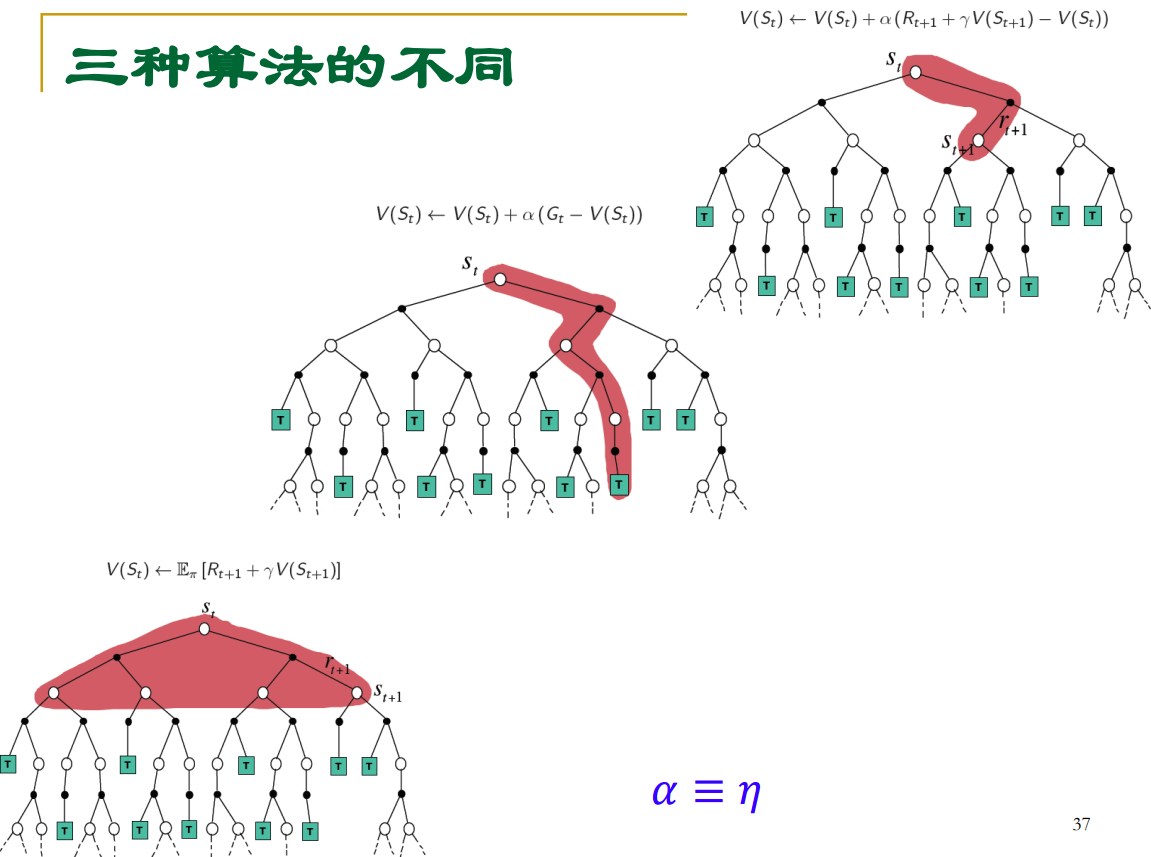

### 批量更新（batch updating）与掫优性

- 在数据有限时, 通常是反复地利用这些数据进行训练,直至迭代收玫。此时只要 $\eta$ 足够小, 就能确定地收玫到与 $\eta$ 无关的唯一结果

#### 比较时序差分（TD）算法和动态规划（DP）算法

为了比较时序差分（TD）算法和动态规划（DP）算法在处理马尔科夫奖励过程时的效果，我们可以设计一个实验来测量在不同步数或幕数下这两种方法的均方根误差（Root Mean Squared Error, RMSE）。这里，我们可以使用一个简单的随机行走示例来进行这个比较。

以下是实验的步骤：

1. 设计一个简单的马尔科夫奖励过程，比如一个一维随机行走。
2. 分别使用TD算法和DP算法来估计该过程的状态价值。
3. 计算每个算法在不同步数或幕数下的均方根误差（RMSE）。
4. 使用Matplotlib绘制比较图。

##### 步骤1: 设计一个简单的马尔科夫奖励过程

在这个例子中，我们可以使用一个一维的随机行走模型。假设有5个状态（除了两个终止状态），代理在每个状态可以选择向左或向右移动，移动到边界时到达终止状态。

##### 步骤2: 实现TD和DP算法

我们需要实现TD(0)算法和一个简单的DP算法（例如策略迭代或价值迭代）来估计状态价值。

##### 步骤3: 计算均方根误差（RMSE）

我们可以使用真实的状态价值（通过DP算法得到的）与TD算法在不同步数下估计的状态价值之间的差异来计算RMSE。

##### 步骤4: 绘制比较图

使用Matplotlib来绘制不同步数下TD算法和DP算法的RMSE比较图。

下面是代码实现的大致框架：

```python
import numpy as np
import matplotlib.pyplot as plt

# 马尔科夫奖励过程的实现
class RandomWalk:
    def __init__(self):
        self.states = np.zeros(7)  # 包括两个终止状态
        self.states[1:6] = 0.5    # 初始状态价值
        self.true_values = np.linspace(0, 1, 7)  # 真实状态价值

    def step(self, state):
        # 随机行走一步
        if np.random.rand() < 0.5:
            return state - 1
        else:
            return state + 1

# TD(0)算法的实现
def td_learning(env, alpha, episodes):
    # 略...

# 动态规划算法的实现
def dynamic_programming(env, threshold=0.0001):
    # 略...

# 计算RMSE
def compute_rmse(estimates, true_values):
    return np.sqrt(np.mean((true_values - estimates)**2))

# 实验
env = RandomWalk()
td_errors = []
dp_values = dynamic_programming(env)

for episodes in range(1, 101):
    td_values = td_learning(env, 0.1, episodes)
    td_errors.append(compute_rmse(td_values, env.true_values))

# 绘图
plt.plot(range(1, 101), td_errors, label='TD(0)')
plt.hlines(compute_rmse(dp_values, env.true_values), 1, 100, colors='red', label='DP')
plt.xlabel('Episodes')
plt.ylabel('Empirical RMS Error')
plt.legend()
plt.show()
```

请注意，这里只是一个框架，具体的函数实现（例如`td_learning`和`dynamic_programming`）需要您根据实际情况填写。这个实验应该能够展示在不同的学习阶段，TD算法和DP算法在估计状态价值方面的表现差异。

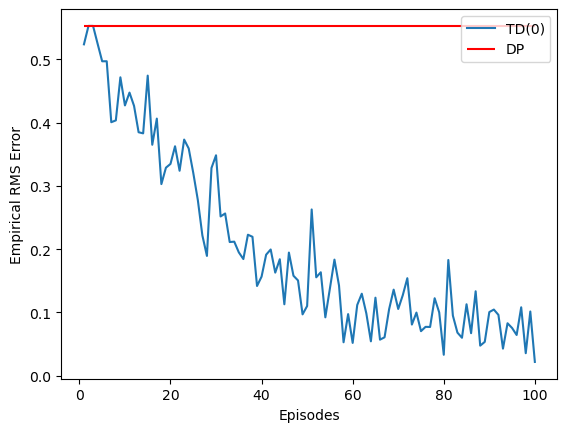

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class RandomWalk:
    def __init__(self):
        self.num_states = 5
        self.states = np.zeros(self.num_states + 2)  # 包括两个终止状态
        self.true_values = np.linspace(0, 1, self.num_states + 2)  # 真实状态价值

    def step(self, state):
        # 随机行走一步
        if np.random.rand() < 0.5:
            next_state = state - 1
        else:
            next_state = state + 1
        reward = 0
        if next_state == 0:
            reward = 0
        elif next_state == self.num_states + 1:
            reward = 1
        return next_state, reward

def td_learning(env, alpha, episodes):
    values = np.zeros(env.num_states + 2)
    for _ in range(episodes):
        state = env.num_states // 2 + 1
        while 0 < state < env.num_states + 1:
            next_state, reward = env.step(state)
            values[state] += alpha * (reward + values[next_state] - values[state])
            state = next_state
    return values

def dynamic_programming(env, gamma=1.0, threshold=0.0001):
    values = np.zeros(env.num_states + 2)
    while True:
        delta = 0
        for state in range(1, env.num_states + 1):
            v = values[state]
            values[state] = 0.5 * (values[state - 1] + values[state + 1])
            delta = max(delta, abs(v - values[state]))
        if delta < threshold:
            break
    return values

def compute_rmse(estimates, true_values):
    return np.sqrt(np.mean((true_values[1:-1] - estimates[1:-1])**2))

env = RandomWalk()
td_errors = []
dp_values = dynamic_programming(env)

for episodes in range(1, 101):
    td_values = td_learning(env, 0.1, episodes)
    td_errors.append(compute_rmse(td_values, env.true_values))

plt.plot(range(1, 101), td_errors, label='TD(0)')
plt.hlines(compute_rmse(dp_values, env.true_values), 1, 100, colors='red', label='DP')
plt.xlabel('Episodes')
plt.ylabel('Empirical RMS Error')
plt.legend()
plt.show()


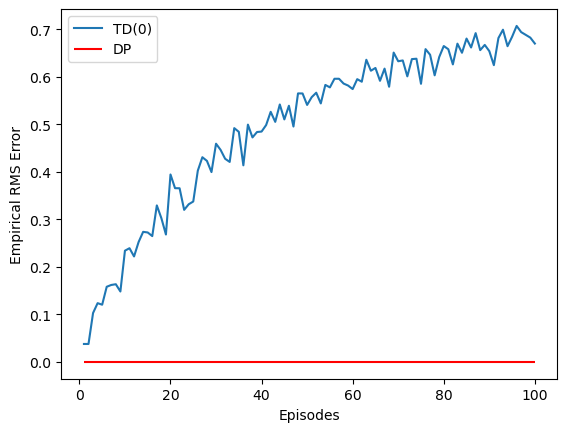

In [41]:
class ExtendedRandomWalk:
    def __init__(self):
        self.num_states = 7
        self.states = np.zeros(self.num_states + 2)  # 包括两个终止状态
        self.true_values = None  # 真实值将通过DP计算

    def step(self, state):
        # 根据不均匀的转移概率进行随机行走
        move = np.random.choice([-1, 1], p=[0.4, 0.6])  # 40%的概率向左，60%的概率向右
        next_state = state + move
        reward = 0
        if next_state == 0:
            reward = 0
        elif next_state == self.num_states + 1:
            reward = 1
        return next_state, reward
    
def dynamic_programming_extended(env, gamma=1.0, threshold=0.0001):
    values = np.zeros(env.num_states + 2)
    while True:
        delta = 0
        for state in range(1, env.num_states + 1):
            v = values[state]
            values[state] = 0.4 * values[state - 1] + 0.6 * values[state + 1]
            delta = max(delta, abs(v - values[state]))
        if delta < threshold:
            break
    env.true_values = values  # 更新真实状态价值
    return values

env = ExtendedRandomWalk()
td_errors = []
dp_values = dynamic_programming_extended(env)

for episodes in range(1, 101):
    td_values = td_learning(env, 0.1, episodes)
    td_errors.append(compute_rmse(td_values, env.true_values))

plt.plot(range(1, 101), td_errors, label='TD(0)')
# 画出DP的误差
plt.hlines(compute_rmse(dp_values, env.true_values), 1, 100, colors='red', label='DP')
plt.xlabel('Episodes')
plt.ylabel('Empirical RMS Error')
plt.legend()
plt.show()




### Sarsa：同轨策略下的时序差分学习

- 动作价值利用下式来计算:
    $$
    \begin{aligned}
    & Q\left(S_t, A_t\right) \leftarrow Q\left(S_t, A_t\right)+\eta\left[R_{t+1}+\gamma Q\left(S_{t+1}, A_{t+1}\right)-Q\left(S_t, A_t\right)\right]
    \end{aligned}
    $$

  - 这里利用了五元组 $\left(\bar{S}_t, \bar{A}_t, R_{t+1}, S_{t+1}, A_{t+1}\right)$, 因此被称为 Sarsa

- 策略的改进仍然是贪心算法, 但基于 $Q\left(S_t, A_t\right)$ 而非 $V\left(S_t\right)$



### Q-学习：离轨策略下的时序差分控制

- 贝尔曼最优方程: 
$$ q_{*}(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \max_{a'} q_{*}(s', a') \right] $$

- Q-学习 (Q-learning) 丛任一策略的结果中估计 $q_*$ :
$$
Q\left(S_t, A_t\right) \leftarrow Q\left(S_t, A_t\right)+\eta\left[R_{t+1}+\gamma \max _a Q\left(S_{t+1}, a\right)-Q\left(S_t, A_t\right)\right]
$$

- [会飞翔的汤姆猫](https://enhuiz.github.io/flappybird-ql/)

- Q 学习：
$$
Q\left(S_t, A_t\right) \leftarrow Q\left(S_t, A_t\right)+\eta\left[R_{t+1}+\gamma \max _a Q\left(S_{t+1}, a\right)-Q\left(S_t, A_t\right)\right]
$$
$$

### 最大化偏差和双学习

$$
\max _a Q\left(S_{t+1}, a\right)
$$

为了求得最优策略, 通常采用包含最大化操作的贪婪算法。这有可能导致严重的正向偏差, 称为最大化偏差 (maximization bias)

例如：对于状态 $S$, 有很多动作 $a$ 可以选择; 而每个真实的 $q(S, a)$ 值都为 0 ; 由于误差的存在, 估计的 $Q(S, a)$ 要么大于 0 , 要么小于 0 ; 在最大化操作后, 就得到了一个正值偏差。

解决方法: 最大化选择与 $Q$ 估值使用分开的独立数据, 如双 Q-学习:
$$
\begin{aligned}
& Q_1\left(\bar{S}_t, A_t\right) \leftarrow Q_1\left(S_t, A_t\right) \\
& \quad+\eta\left[R_{t+1}+\gamma Q_2\left(S_{t+1}, \underset{a}{\arg \max } Q_1\left(S_{t+1}, a\right)\right)-Q_1\left(S_t, A_t\right)\right]
\end{aligned}
$$

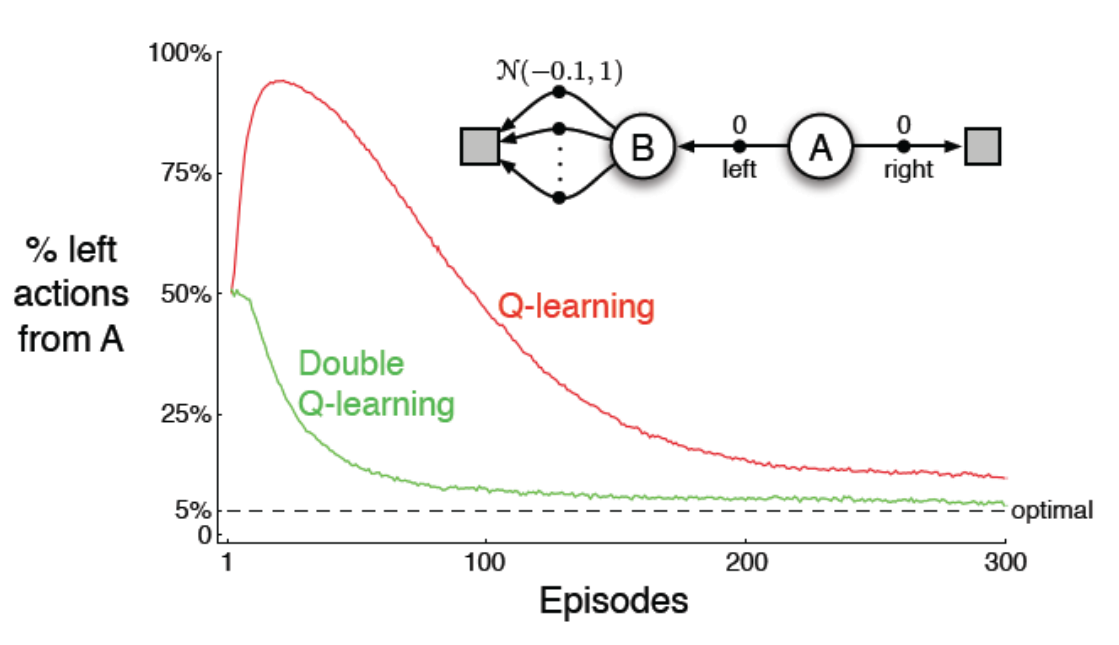

### 小结

- 动态规划可用于模型完全已知的强化学习问题。
- 可通过迭代法求解策略 $\pi$ 的价值函数
$$
v_\pi^{(k+1)}(s)=\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi^{(k)}\left(s^{\prime}\right)\right]
$$

- 策略改进定理：对于确定性的策略 $\pi$ 和 $\pi^{\prime}$ ，如果对任意状态 $s$ 有
$$
q_\pi\left(s, \pi^{\prime}(s)\right) \geq v_\pi(s)
$$

则 $\pi^{\prime}$ 比 $\pi$ 更好, 或至少与 $\pi$ 一样好: $v_{\pi^{\prime}}(s) \geq v_\pi(s)$

- 如果贪心策略与原策略一样好, 则它们都是最佳策略。

- 策略迭代：策略评估 (E) 与策略改进 (I) 不断交替。

- 如果只迭代一次计算 $v_{\pi_k}(s)$, 则得到价值迭代算法:
    $$
    v_{k+1}(s)=\max _a \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_k\left(s^{\prime}\right)\right]
    $$

  - 可看成是贝尔曼最优方程的直接迭代算法。

- 蒙特卡罗方法不需要关于环境的完整信息。用采样序列的性质平均值来估计（代替）其理论期望值

- 同轨策略vs.离轨策略:

  - 同轨策略 (on-policy) : 用于生成采样数据序列的策略 $b$ 和用于实际决策的待评估和改进的策略 $\pi$ 是相同的。

  - 离轨策略（off-policy）：两者是不同的, 即生成的数据 “离开” 了待优化的策略所决定的决策序列轨迹。

- 时序差分方法结合了动态规划与蒙特卡罗方法的想法
$$
V\left(S_t\right) \leftarrow V\left(S_t\right)+\eta\left[R_{t+1}+\gamma V\left(S_{t+1}\right)-V\left(S_t\right)\right]
$$

- 利用轨迹采样, 但不需等一条轨迹结束就能更新。

- Q-学习
$$
Q\left(S_t, A_t\right) \leftarrow Q\left(S_t, A_t\right)+\eta\left[R_{t+1}+\gamma \max _a Q\left(S_{t+1}, a\right)-Q\left(S_t, A_t\right)\right]
$$

动态规划（DP）、蒙特卡罗（MC）方法和时序差分（TD）算法是强化学习中常用的三种主要算法。每种方法都有其独特的特点和应用场景。以下是它们之间的深度比较：

### 动态规划（DP）

动态规划是一种基于模型的强化学习方法，它依赖于对环境的完全了解（即状态转移概率和奖励函数是已知的）。

1. **优点**:
   - **效率和准确性**：在已知环境模型的情况下，DP可以非常准确地计算出策略或价值函数。
   - **保证收敛**：在理论上，DP保证了对于给定的MDP，其策略迭代和价值迭代将收敛到最优策略。

2. **缺点**:
   - **计算成本**：对于状态和动作空间很大的问题，DP算法的计算成本可能会非常高。
   - **模型依赖性**：DP要求对环境的完全了解，这在很多实际问题中是不现实的。

### 蒙特卡罗方法（MC）

蒙特卡罗方法是一种基于经验的方法，它通过对完整幕（episode）的样本进行学习。

1. **优点**:
   - **无需环境模型**：MC方法不需要环境的先验知识。
   - **直接估计**：它直接从实际回报估计价值函数，不涉及其他状态的价值估计。

2. **缺点**:
   - **高方差**：由于基于完整幕的回报，MC方法可能有较高的方差，特别是在长幕中。
   - **仅适用于分幕任务**：MC方法只适用于可以清晰分幕的任务。

### 时序差分算法（TD）

时序差分算法结合了DP和MC的特点，它通过对一幕中的一步或几步进行学习。

1. **优点**:
   - **灵活性**：TD算法既可以在幕结束时学习（类似MC），也可以在幕中逐步学习（类似DP）。
   - **低方差**：与MC方法相比，TD通常具有较低的方差。
   - **无需完整的幕**：TD方法不需要等待整个幕结束就可以进行学习。

2. **缺点**:
   - **偏差**：由于它是基于对未来价值的估计，TD方法可能会引入偏差。
   - **调参要求**：TD学习的效果很大程度上取决于学习率等参数的选择。

### 综合比较

- **模型依赖性**：DP需要对环境的完全了解，而MC和TD则不需要。
- **数据效率**：DP通常更高效，因为它利用了环境模型。MC和TD通常需要更多的数据来获得准确的估计。
- **实时学习能力**：TD和MC允许从实际经验中学习，而DP则依赖于预先定义的模型。
- **应用场景**：DP适合于模型已知且状态空间较小的任务。MC适用于可以明确分幕的任务。TD则在这两者之间，既适用于连续任务也适用于分幕任务。

总之，选择哪种方法取决于具体任务的特性，如环境是否已知、任务